**INTRO**:
En el siguiente análisis exploratorio de los datos relacionaré los accidentes con distintos factores, cómo las victimas, las comunas o el paso del tiempo, obteniendo así métricas ACCIDENTES - FACTOR.   
A su vez en cada sección iré asentando **Highlights** los cuales destacarán observaciones y conclusiones de los datos que se van analizando. 
Además, crearé en algunos casos **anexos** que son la consecuencia de querer entender un poco más los datos. En estos anexos analizo otros databases para entender un poco mejor el comportamiento de los datos. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
hechos = pd.read_csv(r'DataBases\hechos_ETL.csv')
victimas = pd.read_csv(r'DataBases\victimas_ETL.csv')

## ACCIDENTES EN EL TIEMPO 

Comenzamos conociendo como se han comportados los datos a lo largo del tiempo, la distribución de accidentes a lo largo de los años.

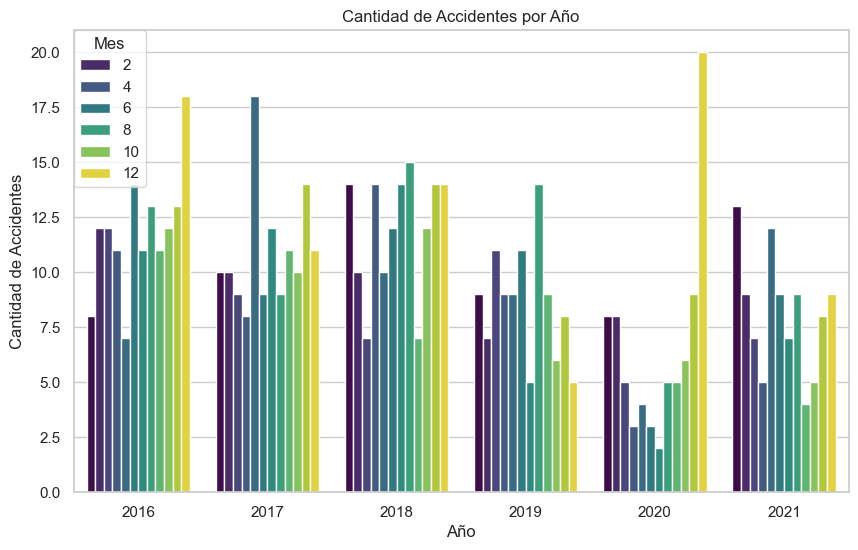

In [3]:
sns.set(style="whitegrid")

# Gráfico de barras para la cantidad de accidentes por año y por mes 
plt.figure(figsize=(10, 6))
sns.countplot(data=hechos, x='anio', palette='viridis', hue = 'mes')
plt.title('Cantidad de Accidentes por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')
plt.legend(title='Mes', loc='upper left', borderaxespad=0.)
plt.show()

#### HIGHLIGHT #1: Como era de esperar, en el año 2020, año lockdown por la pandemia, hay una caída en los números de victimas fatales por accidentes de tránsito debido a la poca circulación de automoviles.

<Figure size 1500x600 with 0 Axes>

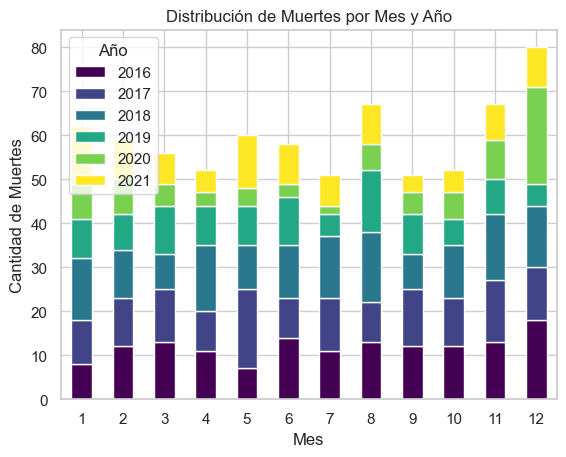

In [4]:
### Ahora analizamos la distribucion centrandonos en los meses.
# estilo gráfico
sns.set(style="whitegrid")

#DataFrame pivotado para las muertes por mes y año
muertes_por_mes_y_anio = hechos.pivot_table(index='mes', columns='anio', values='cantidad_victimas', aggfunc='sum')

#Distribución de muertes por mes y año
plt.figure(figsize=(15, 6))
muertes_por_mes_y_anio.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Distribución de Muertes por Mes y Año')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Muertes')
plt.xticks(rotation=0)  # Evitar la rotación de los ticks del eje x
plt.legend(title='Año', loc='upper left')
plt.show()

#### HIGHLIGHT #2: Se concentra una gran cantidad de accidentes en los meses de noviembre y diciembre. Meses que son más festivos en Argentina, debido a la previa de vacaciones, navidad y año nuevo. No es un dato menor que en los meses de verano hay más actividades, festivales y eventos masivos, por lo que se genera más circulación de vehículos.

#### ANEXO_I: en el anexo 1 importamos los datos de los eventos masivos que se realizaron en CABA para analizar si en agosto, noviembre y diciembre (meses con más accidentes), hay una alta ocncentración de eventos masivos lo que posiblemente provoca más accidentes. 

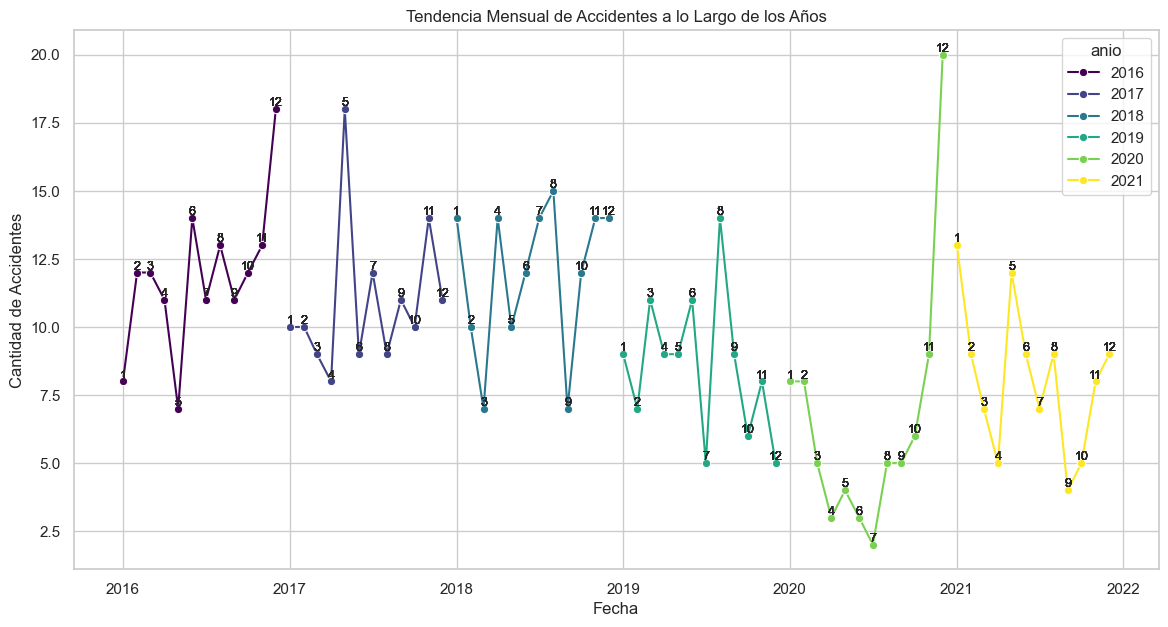

In [5]:
#Distribución de las muertes por accidentes viales a lo largo de los años.

#Columna 'fecha' a tipo datetime para extraer el año y el mes
hechos['fecha'] = pd.to_datetime(hechos['fecha'])
hechos['anio'] = hechos['fecha'].dt.year
hechos['mes'] = hechos['fecha'].dt.month

#Número de accidentes por año y mes
accidentes_mensuales = hechos.groupby(['anio', 'mes']).size().reset_index(name='cantidad_accidentes')

#Columna 'fecha' para una correcta representación temporal
accidentes_mensuales['fecha'] = pd.to_datetime(accidentes_mensuales['anio'].astype(str) + '-' + accidentes_mensuales['mes'].astype(str) + '-01')

#Gráfico de línea para la tendencia mensual a lo largo de los años
plt.figure(figsize=(14, 7))
line_plot = sns.lineplot(data=accidentes_mensuales, x='fecha', y='cantidad_accidentes', marker='o', palette='viridis', hue='anio')
plt.title('Tendencia Mensual de Accidentes a lo Largo de los Años')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Accidentes')

for line in line_plot.lines:
    for x, y, label in zip(accidentes_mensuales['fecha'], accidentes_mensuales['cantidad_accidentes'], accidentes_mensuales['mes']):
        plt.text(x, y, label, fontsize=9, ha='center', va='bottom')

plt.show()

#### HIGHLIGHT #3: Vemos un pico de muertes en el mes 12 del 2020, mes en el que estaba comenzando a reabrir locales, se estaba volviendo con los eventos al aire libre, estaban volviendo a haber actividades, después de un año de encierro. Habría que estudiar sociologicamente este fenómeno porque es posible que se deba a la necesitad de la gente de volver a retomar su vida, ya que en los registros no hay ningún accidente específico de gran escala en ese mes . 

Desenado entrar un poco más a lo específico trabajo con unidades más pequeñas como son los días y horas:

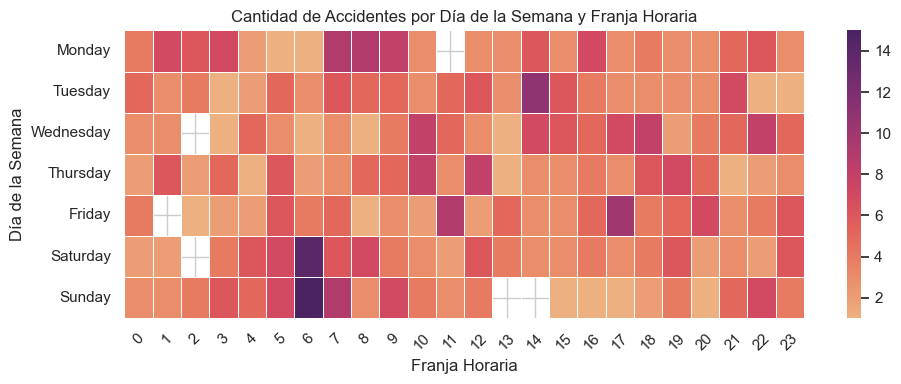

In [16]:
# Asegúrate de que la columna de fechas esté en formato datetime
hechos['fecha'] = pd.to_datetime(hechos['fecha'])

# Crear la columna 'dia_semana' si no existe
if 'dia_semana' not in hechos.columns:
    hechos['dia_semana'] = hechos['fecha'].dt.day_name()

# Datos por día de la semana y franja horaria y contar la cantidad de accidentes
accidentes_por_dia_y_franja = hechos.groupby(['dia_semana', 'franja_horaria']).size().unstack()

# Reordenar los días de la semana en inglés
dias_semana_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
accidentes_por_dia_y_franja = accidentes_por_dia_y_franja.reindex(dias_semana_ordenados)

# Gráfico de calor
plt.figure(figsize=(10, 4))
sns.heatmap(accidentes_por_dia_y_franja, cmap='flare', annot=False, fmt='g', linewidths=.5)
plt.title('Cantidad de Accidentes por Día de la Semana y Franja Horaria')
plt.xlabel('Franja Horaria')
plt.ylabel('Día de la Semana')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### HIGHLIGHT #4: Con este gráfico, viendo que la mayoría de muertes por accidentes de tránsito se concentra sábados y domingos por la madrugada, podríamos empezar a pensar en relación de las muertes con la vida nocturna y la ingesta de alcohol.

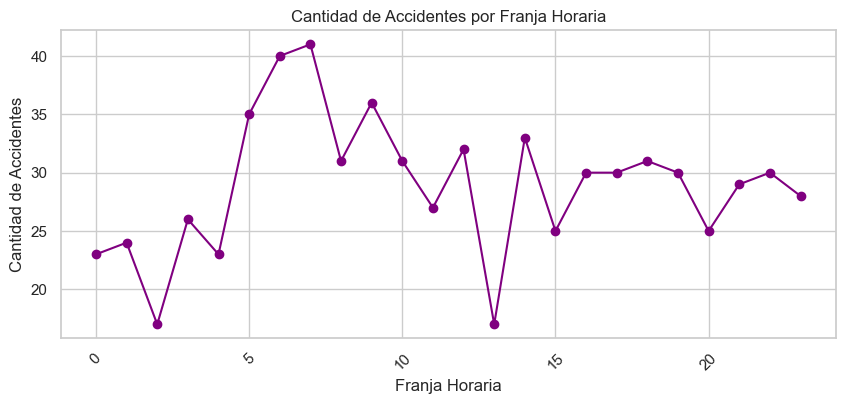

In [17]:
# Creamos un gráfico para ver en que franjas horarias se concentran la mayoría de los accidentes

# Agrupar los datos por franja horaria y contar la cantidad de accidentes
accidentes_por_hora = hechos['franja_horaria'].value_counts().sort_index()

# Crear el gráfico de líneas para la cantidad de accidentes por franja horaria
plt.figure(figsize=(10, 4))
accidentes_por_hora.plot(kind='line', marker='o', color='purple')
plt.title('Cantidad de Accidentes por Franja Horaria')
plt.xlabel('Franja Horaria')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)  # Rotar los ticks del eje x para mejorar la legibilidad
plt.grid(True)  # Agregar una cuadrícula para facilitar la lectura de los valores
plt.show()

Como en el gráfico anterior pude observar que la mayoría de muertes se producen entre las 5 y las 9 am, quisiera ver que días de la semana se producen más muertes en ese rango horario, para eso hacemos el siguiente gráfico:

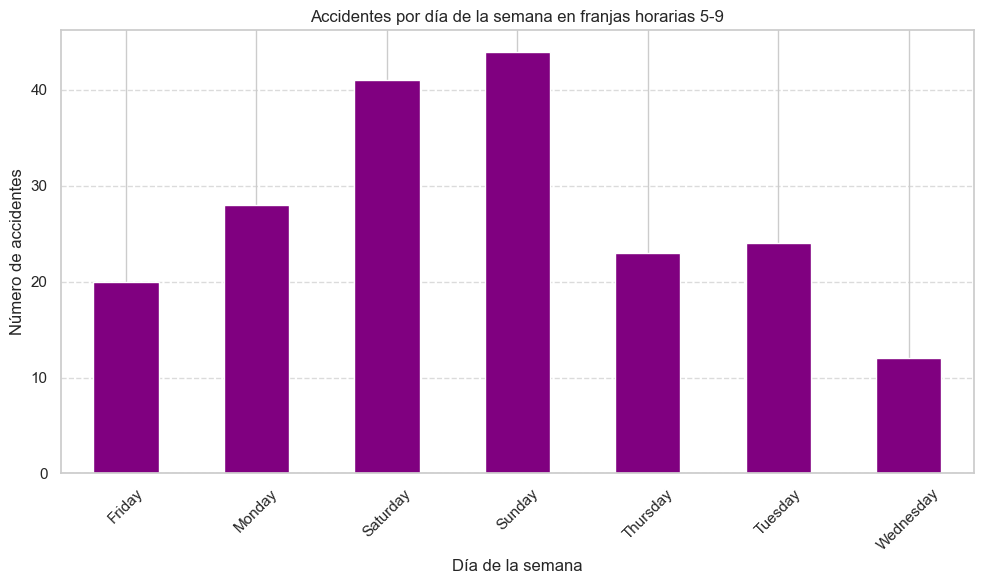

In [18]:

#Combinar la información de los dataframes
data = pd.merge(hechos, victimas, on='id_hecho')

#Filtrar los datos por franja horaria
franjas_horarias = [5, 6, 7, 8, 9]
data = data[data['franja_horaria'].isin(franjas_horarias)]

#Convertir la columna 'fecha' a tipo datetime para extraer el día de la semana
data['fecha'] = pd.to_datetime(data['fecha'])
data['dia_semana'] = data['fecha'].dt.day_name()

#Conteo  de número de accidentes por día de la semana
accidentes_por_dia = data['dia_semana'].value_counts().sort_index()

#Gráfico:
plt.figure(figsize=(10, 6))
accidentes_por_dia.plot(kind='bar', color='purple')
plt.title('Accidentes por día de la semana en franjas horarias 5-9')
plt.xlabel('Día de la semana')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### HIGHLIGHT #5: Vemos efectivamente que la mayoría de muertes se produce los fines de semana a la madrugada

## ACCIDENTES, COMUNAS Y TIPO DE CALLE

SECCIÓN 2: Comienzo analizando las comunas, ya teniendo en conocimiento la relación entre las muertes y la vida nocturna. 

In [12]:
df_comunas = pd.read_csv(r'DataBases\DataBases_complementarias\comunas2.csv', encoding='latin1')

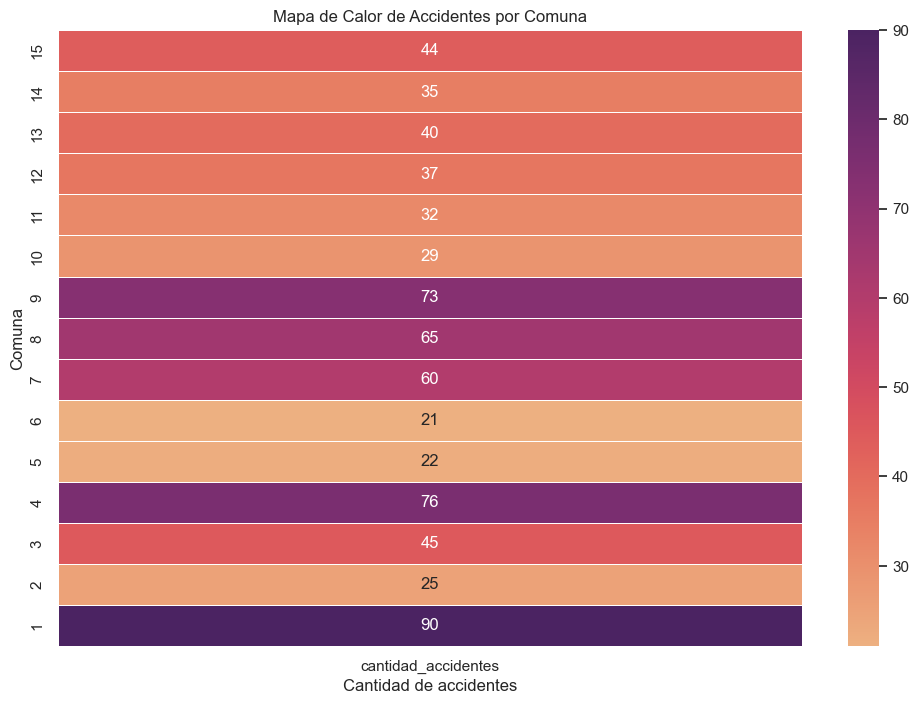

In [14]:
# Ordenar las comunas de 15 a 1 en orden descendente
orden_comunas = [str(i) for i in range(15, 0, -1)]

# Agrupar los datos por comuna y contar la cantidad de accidentes
accidentes_por_comuna = hechos.groupby('comuna').size().reset_index(name='cantidad_accidentes')

# Asegurarnos de que las comunas sean tratadas como categorías ordenadas
accidentes_por_comuna['comuna'] = accidentes_por_comuna['comuna'].astype(str)
accidentes_por_comuna['comuna'] = pd.Categorical(accidentes_por_comuna['comuna'], categories=orden_comunas, ordered=True)

# Pivotar los datos para el heatmap
pivot_table = accidentes_por_comuna.pivot_table(index='comuna', values='cantidad_accidentes', aggfunc='sum',  observed=False)

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='flare', linewidths=.5)
plt.title('Mapa de Calor de Accidentes por Comuna')
plt.xlabel('Cantidad de accidentes')
plt.ylabel('Comuna')
plt.show()

#### ANEXO_II: en el anexo 2 importé los datos de los barrios que componen cada comuna, para poder tener más conocimiento sobre cada una

In [15]:
#LISTA DE LAS COMUNAS:
df_comunas


,comuna,barrios
0,2,RECOLETA
1,6,CABALLITO
2,10,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...
3,11,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....
4,12,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...
5,14,PALERMO
6,15,AGRONOMIA - CHACARITA - PARQUE CHAS - PATERN...
7,13,BELGRANO - COLEGIALES - NUÃEZ
8,4,BARRACAS - BOCA - NUEVA POMPEYA - PARQUE PATRI...
9,5,ALMAGRO - BOEDO


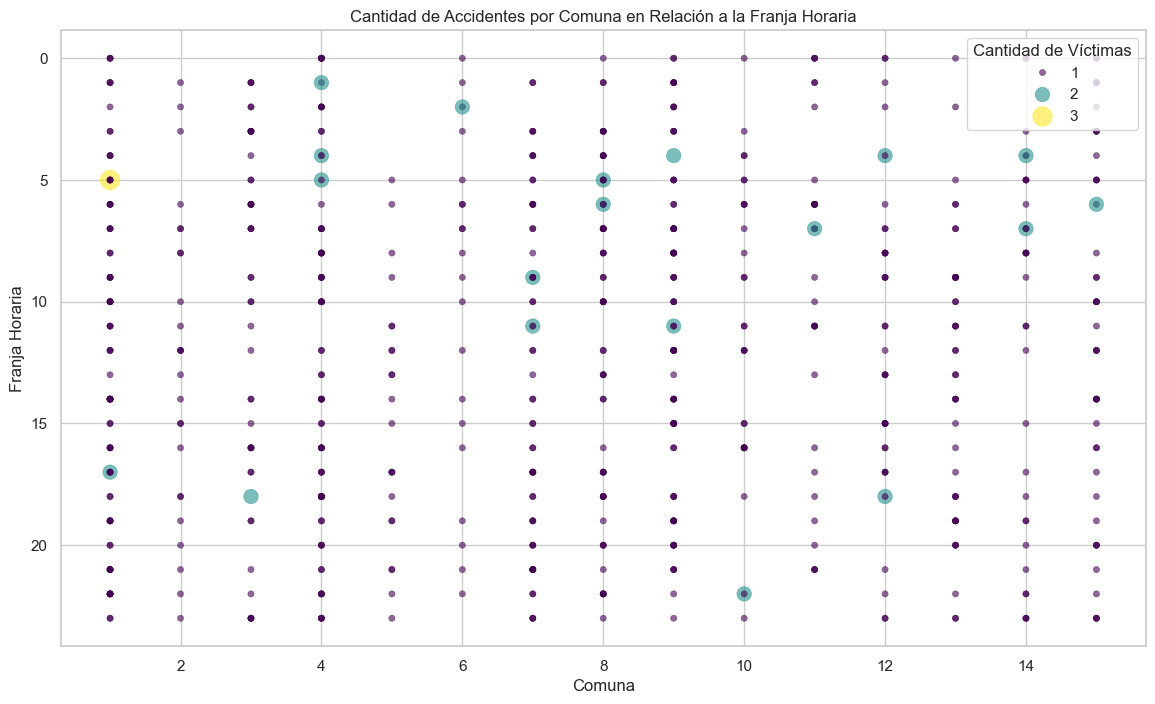

In [ ]:
# Ordenar las comunas y las franjas horarias
orden_comunas = sorted(hechos['comuna'].unique(), key=int)
orden_franjas_horarias = sorted(hechos['franja_horaria'].unique())

# Convertir las columnas a categorías ordenadas
hechos['comuna'] = pd.Categorical(hechos['comuna'], categories=orden_comunas, ordered=True)
hechos['franja_horaria'] = pd.Categorical(hechos['franja_horaria'], categories=orden_franjas_horarias, ordered=True)

# Crear el gráfico de dispersión
plt.figure(figsize=(14, 8))
scatter_plot = sns.scatterplot(data=hechos, x='comuna', y='franja_horaria', size='cantidad_victimas', hue='cantidad_victimas', palette='viridis', sizes=(20, 200), alpha=0.6, edgecolor=None)
plt.title('Cantidad de Accidentes por Comuna en Relación a la Franja Horaria')
plt.xlabel('Comuna')
plt.ylabel('Franja Horaria')
plt.legend(title='Cantidad de Víctimas', loc='upper right')
plt.show()

#### HIGHLIGHT #6: Puedo observar con este gráfico que las comunas con más accidentes nocturnos en las horas de la madrugada son las comunas 1, 4, 6, 8, 12, 14.   Una buena decisión sería aconsejar al municipio de la ciudad de Buenos Aires, aumentar el control en estas comunas en las horas de la madrugada.

C:\Users\pauda\AppData\Local\Temp\ipykernel_5580\4129854682.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accidentes_por_comuna_y_calle = hechos.groupby(['comuna', 'tipo_calle']).size().reset_index(name='cantidad_accidentes')


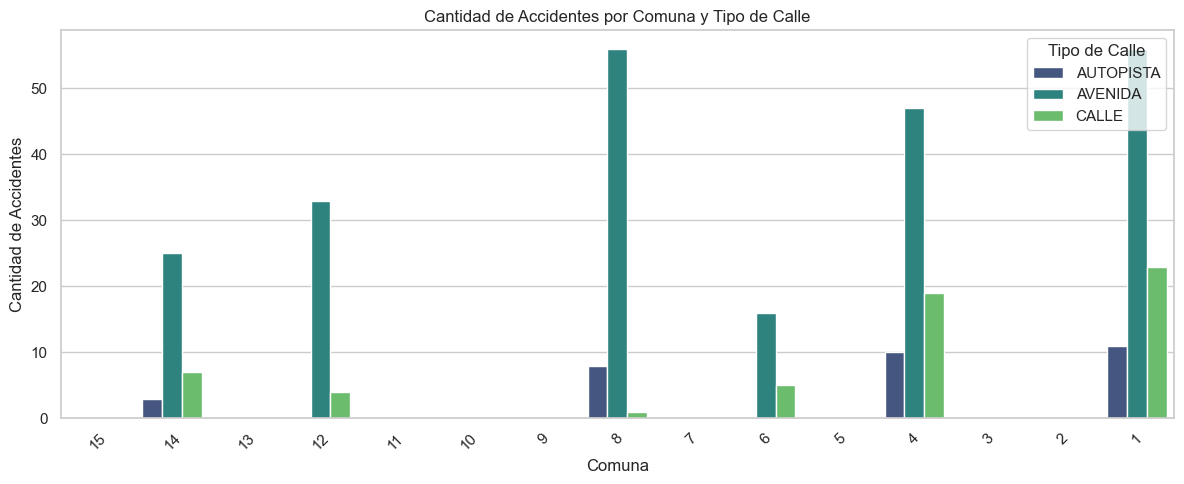

In [ ]:
#Datos por comuna y tipo de calle, y contar la cantidad de accidentes
accidentes_por_comuna_y_calle = hechos.groupby(['comuna', 'tipo_calle']).size().reset_index(name='cantidad_accidentes')

accidentes_por_comuna_y_calle['comuna'] = accidentes_por_comuna_y_calle['comuna'].astype(str)
accidentes_por_comuna_y_calle['comuna'] = pd.Categorical(accidentes_por_comuna_y_calle['comuna'], categories=orden_comunas, ordered=True)

# Filtrar las comunas específicas
comunas_interes = ['1', '4', '6', '8', '12', '14']
accidentes_por_comuna_y_calle = accidentes_por_comuna_y_calle[accidentes_por_comuna_y_calle['comuna'].isin(comunas_interes)]

# Crear el gráfico de barras apilado
plt.figure(figsize=(12, 5))
sns.barplot(data=accidentes_por_comuna_y_calle, x='comuna', y='cantidad_accidentes', hue='tipo_calle', palette='viridis')
plt.title('Cantidad de Accidentes por Comuna y Tipo de Calle')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Accidentes')
plt.legend(title='Tipo de Calle', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### HIGHLIGHT #7: podría aconsejar además de que estos controles en las comunas 1, 4, 6, 8, 12, 14, conviene hacerlos en las avenidas, visto y considerando con el gráfico anterior que la mayoría de muertes suceden en este tipo de calle.

## COMUNAS Y LOCALES BAILABLES / ANEXO II 
Teniendo como input las horas donde hay más accidentes fatales y intentando buscar una causa a este hecho, importé en el anexo II una base de datos con de los locales bailables en la ciudad de Buenos Aires. Traeremos acá el dataset para cruzar datos y conseguir patrones  

In [21]:
bailables = pd.read_csv(r'DataBases\DataBases_complementarias\bailables.csv', encoding='latin1')

In [22]:
bailables.head()

,latitud,longitud,direccion,barrio,comuna,capacidad,estado
0,-34.598690,-58.423558,GASCON 1036,Almagro,5,2450,Renovado 2015
1,-34.629937,-58.469873,NAZCA AV. 55,Flores,7,778,Renovado 2015
2,-34.601096,-58.398115,VIAMONTE 2168,Balvanera,3,425,Renovado 2015
3,-34.631147,-58.471661,RIVADAVIA AV. 7523,Flores,7,216,Renovado 2015
4,-34.605939,-58.364037,"COSSETTINI, OLGA 751",Puerto Madero,1,622,Renovado 2016


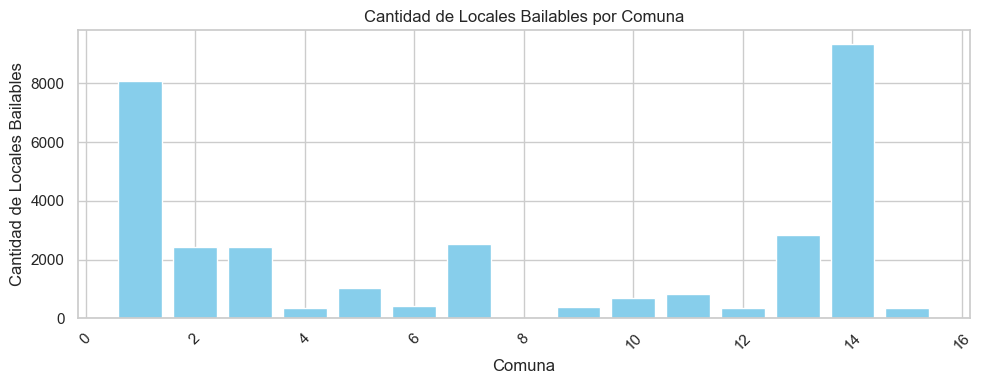

In [23]:
# Contar la cantidad de locales bailables por comuna
locales_por_comuna = bailables['comuna'].value_counts().reset_index()
locales_por_comuna.columns = ['comuna', 'cantidad_locales']

# Ordenar los datos por comuna
locales_por_comuna = locales_por_comuna.sort_values(by='comuna')

# Crear el gráfico de barras
plt.figure(figsize=(10, 4))
plt.bar(locales_por_comuna['comuna'], locales_por_comuna['cantidad_locales'], color='skyblue')
plt.title('Cantidad de Locales Bailables por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Locales Bailables')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

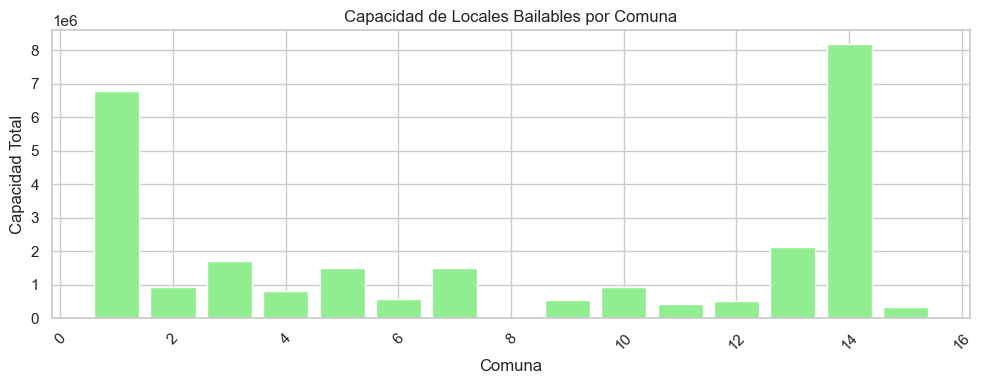

In [24]:
# Sumar la capacidad de los locales bailables por comuna
capacidad_por_comuna = bailables.groupby('comuna')['capacidad'].sum().reset_index()

# Ordenar los datos por comuna
capacidad_por_comuna = capacidad_por_comuna.sort_values(by='comuna')

# Crear el gráfico de barras
plt.figure(figsize=(10, 4))
plt.bar(capacidad_por_comuna['comuna'], capacidad_por_comuna['capacidad'], color='lightgreen')
plt.title('Capacidad de Locales Bailables por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Capacidad Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Vemos que la capacidad de los locales bailables se comporta de una forma muy parecida a la cantidad de locales bailables. 

#### HIGHLIGHT #8: Sabiendo la cantidad de locales bailables en la comuna 1 y 14, y cruzando los datos con la cantidad elevada de muertes por accidentes que se producen en estas dos comunas los fines de semana en horas de la madrugada, se aconseja aumentar el control de alcoholemia en estas zonas y los alrededores en avenidas.  

## ACCIDENTES y ACUSADOS

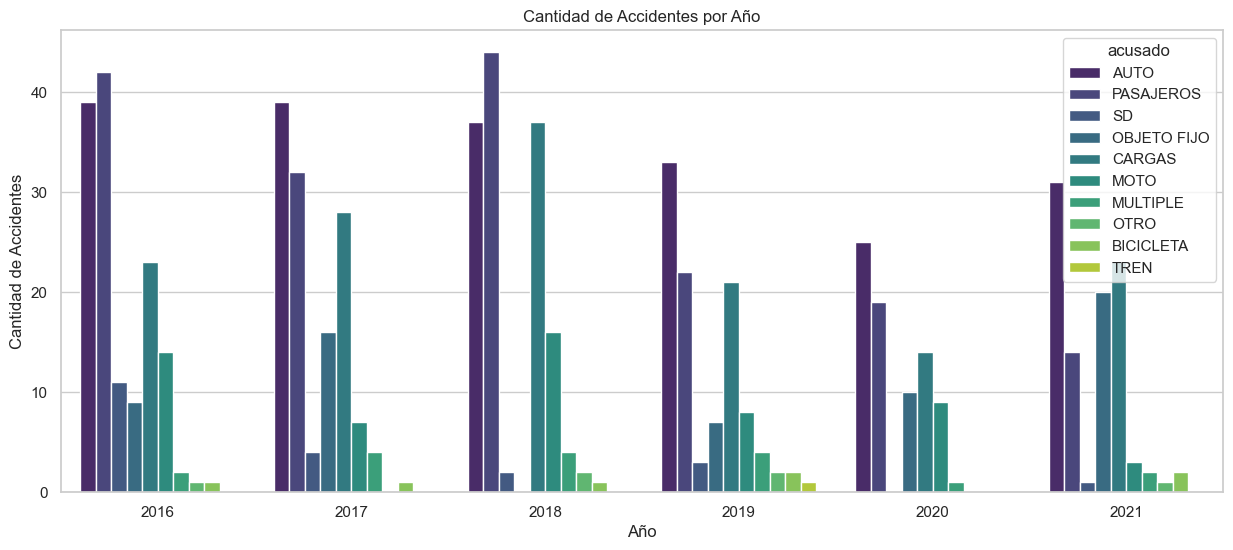

In [ ]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Gráfico de barras para la cantidad de accidentes por año y por mes 
plt.figure(figsize=(15, 6))
sns.countplot(data=hechos, x='anio', palette='viridis', hue = 'acusado')
plt.title('Cantidad de Accidentes por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')
plt.show()

#### HIGHLIGHT #9: El control más exaustivo se debería hacer sobre los AUTOS, exigiendole precausión

## ACCIDENTES y VICTIMAS

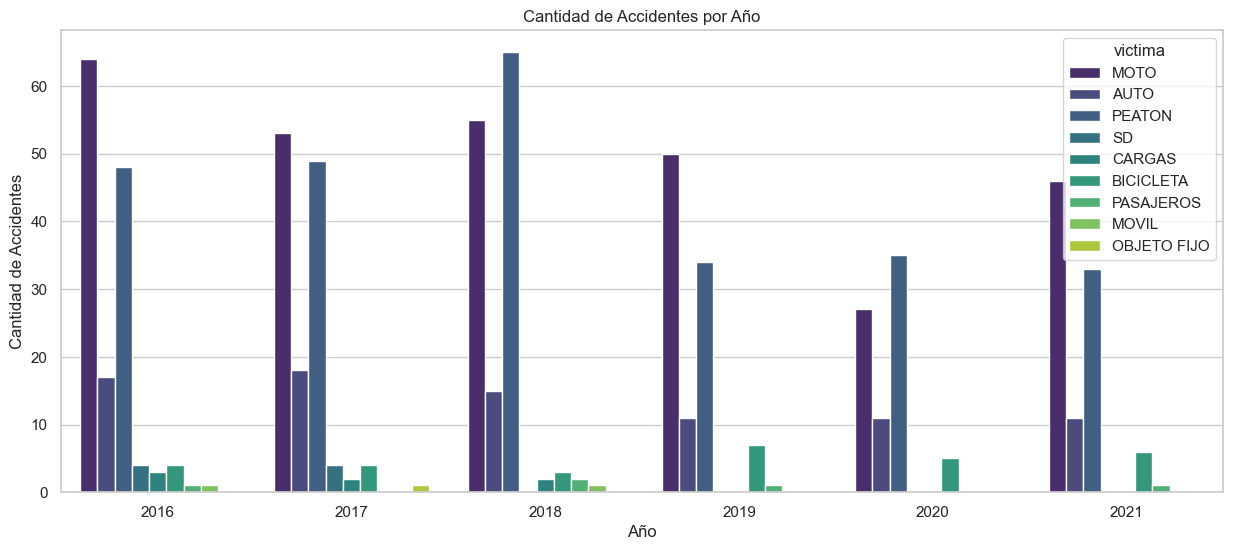

In [7]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Gráfico de barras para la cantidad de accidentes por año y por mes 
plt.figure(figsize=(15, 6))
sns.countplot(data=hechos, x='anio', palette='viridis', hue = 'victima')
plt.title('Cantidad de Accidentes por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')
plt.show()

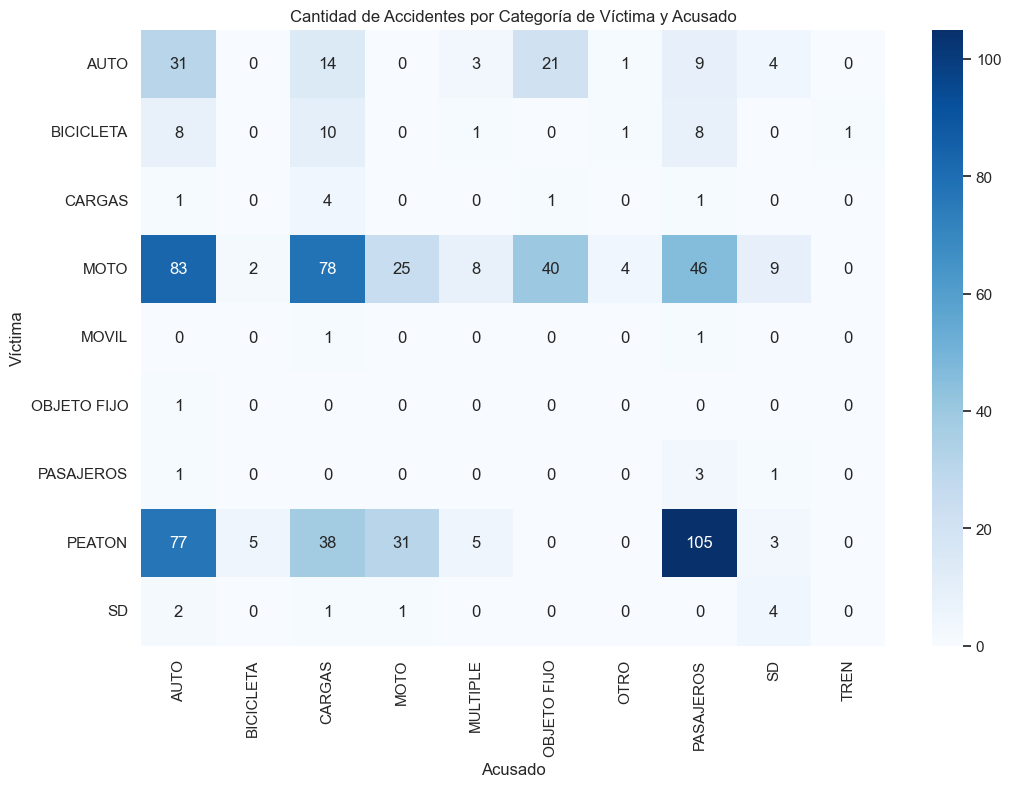

In [8]:
# Tabla pivote para contar las combinaciones de víctima y acusado
pivot_table = pd.crosstab(hechos['victima'], hechos['acusado'])

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues')
plt.title('Cantidad de Accidentes por Categoría de Víctima y Acusado')
plt.xlabel('Acusado')
plt.ylabel('Víctima')
plt.show()

#### HIGHLIGHT #10: Vemos en el gráfico que una gran taza de homicidios se producen por parte de autos y medios de transportes públicos, y las mayores víctimas son peatones y motos.

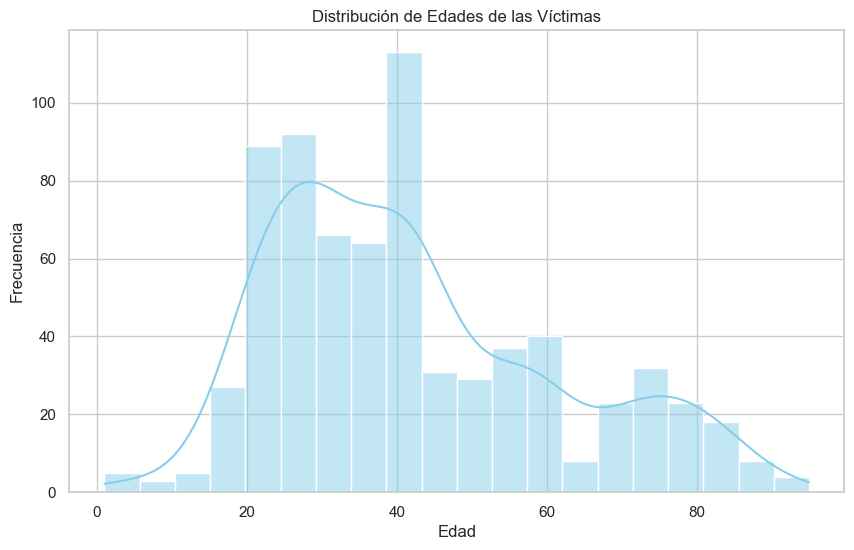

In [78]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Histograma para la distribución de edades de las víctimas
plt.figure(figsize=(10, 6))
sns.histplot(data=victimas, x='edad_victima', bins=20, kde=True, color='skyblue')
plt.title('Distribución de Edades de las Víctimas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

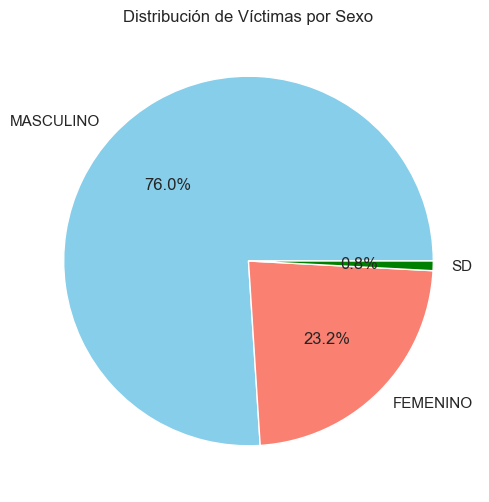

In [110]:
# Contar la cantidad de víctimas por sexo
victimas_por_sexo = victimas['sexo_victima'].value_counts()

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de torta para la distribución de víctimas por sexo
plt.figure(figsize=(8, 6))
plt.pie(victimas_por_sexo, labels=victimas_por_sexo.index, autopct='%1.1f%%', colors=['skyblue', 'salmon', 'green'])
plt.title('Distribución de Víctimas por Sexo')
plt.show()

## CONCLUSIONES:

- A través de este análisis exploratorio de los datos he podido observar como se comportan los registros de accidentes fatales en la Ciudad de Buenos Aires. 
- Puedo obtener como conclusión que los meses con más accidentes son los meses festivos, en dónde la población sale más de sus hogares y hay más actividades en la ciudad. Sin embargo las muertes por accidentes viales se registran a lo largo de todo el año, debiendo tomar medidas urgentes para bajar este índice. Observando también una baja en el número de accidentes fatales en el año 2020 disminuyó abruptamente debido al lockdown. 
- Observé a través del cruce de métricas que hay una gran concentración de accidentes fatales los fines de semana en la madrugada en comunas específicas, comunas que contienen mayor densidad de bares y locales bailables, por lo que se llama a una toma de medidas urgentes en cuanto a los controles de alcoholemia. 
- La mayor cantidad de accidentes se producen en avenidas de estas comunas y se observa que la mayoría de accidentes son provocados por autos. 
- En lo que respecta a las víctimas fatales, podemos observar que la mayoría son personas de sexo masculino, entre los 20 y 40 años. También pude observar un registro altísimo de peatones víctimas fatales de accidentes de tránsito por lo que se llama a tomar medidas en cuanto a la consientización del automovilista en el respeto del peatón.